In [ ]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# json 파일 다루기
import json

In [ ]:
# 파일 존재 여부 확인용
import os

원본 데이터셋에 폴더가 24개가 있으므로, 한 폴더당 500개씩 샘플링하면 12,000개가 되겠다.

# 변수 목록

In [ ]:
max_file_name = 1347233 # 폴더 내 가장 이름이 높은 파일명의 숫자
ori_img_dir_name = "/home/ubuntu/k-fashion/014.KFashion/01.데이터/1.Training/원천데이터_modify/힙합/" # 원본 이미지 파일이 존재하는 디릭토리명
ori_json_dir_name = "/home/ubuntu/k-fashion/014.KFashion/01.데이터/1.Training/라벨링데이터_modify/힙합/" # 원본 json 파일이 존재하는 디렉토리명

max_read_size = 12000 # 좌우반전한 파일이름 저장용. 분할실행까지 합쳐서 디렉토리에 저장할 전체 파일 갯수

proc_img_dir_name = "./Dataset/Image/" # 샘플링된 이미지를 저장할 디렉토리명
proc_json_dir_name = "./Dataset/Json/" # 샘플링된 json 파일을 저장할 디렉토리명

# 데이터 불러오기

## 혹시 모르니 분할실행용 코드

In [ ]:
#  처음 실행할 때만 실행
# 실행하고나면 실수하지 않게 주석처리

# end_read_point = 0 # 직전까지 읽어왔던 최종 파일의 숫자
# end_save_point = 0 # 직전까지 저장했던 최종 파일의 숫자

In [ ]:
end_read_point = 6254 # 직전까지 읽어왔던 최종 파일의 숫자

In [ ]:
print("End Read Point: " + str(end_read_point))
print("End Save Point: " + str(end_save_point))

End Read Point: 6254
End Save Point: 10881


In [ ]:
start_read_point = end_read_point + 1

read_file_size = 500 # 한번에 읽어들일 파일 사이즈

start_save_point = end_save_point + 1

In [ ]:
print("End Read Point: " + str(end_read_point))
print("Start Read Point : " + str(start_read_point))
print()
print("Read File Size: " + str(read_file_size))
print()
print("End Save Point: " + str(end_save_point))
print("Start Save Point : " + str(start_save_point))

End Read Point: 6254
Start Read Point : 6255

Read File Size: 500

End Save Point: 10881
Start Save Point : 10882


## 이미지 목록 불러오기

In [ ]:
ori_img_list = []

for i in range(start_read_point, max_file_name+1):

    file_name = ori_img_dir_name + str(i) + ".jpg"

    if not os.path.isfile(file_name): # 해당 파일명이 디렉토리에 존재하는지 체크
        continue

    # 파일이 존재하면
    ori_img_file = cv2.imread(file_name)

    if ori_img_file is None: # 파일 불러오기 실패
        print(str(i) + ".jpg 파일 불러오기 실패")
        break
    else: # 파일 불러오기 성공
        end_read_point = i

    ori_img_list.append(ori_img_file)

    if (len(ori_img_list)%50) == 0: # 진행도 확인용
        print(str(len(ori_img_list)) + "개 이미지 파일 읽어오기 완료")

    if (len(ori_img_list)) == read_file_size: # 최대 읽을 파일 개수까지 읽은 경우
        break


# 다 끝나면
print()
print(str(end_read_point) + ".jpg까지 파일 읽어오기 완료")

50개 이미지 파일 읽어오기 완료
100개 이미지 파일 읽어오기 완료
150개 이미지 파일 읽어오기 완료
200개 이미지 파일 읽어오기 완료
250개 이미지 파일 읽어오기 완료
300개 이미지 파일 읽어오기 완료
350개 이미지 파일 읽어오기 완료
400개 이미지 파일 읽어오기 완료
450개 이미지 파일 읽어오기 완료
500개 이미지 파일 읽어오기 완료

548327.jpg까지 파일 읽어오기 완료


In [ ]:
len(ori_img_list)

500

## json 목록 불러오기

In [ ]:
ori_json_list = []

for i in range(start_read_point, max_file_name+1):

    file_name = ori_json_dir_name + str(i) + ".json"

    if not os.path.isfile(file_name): # 해당 파일명이 디렉토리에 존재하지 않을 때
        continue

    # 파일이 존재하면
    with open(file_name, "r", encoding="UTF-8") as loadfile:
        ori_json_file = json.load(loadfile)

    if ori_json_file is None: # 파일 불러오기 실패
        print(str(i) + ".json 파일 불러오기 실패")
        break
    else: # 파일 불러오기 성공
        end_read_point = i

    ori_json_list.append(ori_json_file)

    if (len(ori_json_list)%50) == 0: # 진행도 확인용
        print(str(len(ori_json_list)) + "개 json 파일 읽어오기 완료")

    if (len(ori_json_list)) == read_file_size: # 최대 읽을 파일 개수까지 읽은 경우
        break


# 다 끝나면
print()
print(str(end_read_point) + ".json까지 파일 읽어오기 완료")

50개 json 파일 읽어오기 완료
100개 json 파일 읽어오기 완료
150개 json 파일 읽어오기 완료
200개 json 파일 읽어오기 완료
250개 json 파일 읽어오기 완료
300개 json 파일 읽어오기 완료
350개 json 파일 읽어오기 완료
400개 json 파일 읽어오기 완료
450개 json 파일 읽어오기 완료
500개 json 파일 읽어오기 완료

548327.json까지 파일 읽어오기 완료


In [ ]:
len(ori_json_list)

500

# 이미지 파일과 json 파일을 한 리스트에 묶어서 저장

In [ ]:
ori_file_list = []

for i in range(0, len(ori_img_list)):
    tmp_list = []

    tmp_list.append(ori_img_list[i])
    tmp_list.append(ori_json_list[i])

    ori_file_list.append(tmp_list)

    if (i+1)%50 == 0: # 진행도 확인용
        print(str(i+1) + "개 리스트 저장 완료")

print()
print("Complete")

50개 리스트 저장 완료
100개 리스트 저장 완료
150개 리스트 저장 완료
200개 리스트 저장 완료
250개 리스트 저장 완료
300개 리스트 저장 완료
350개 리스트 저장 완료
400개 리스트 저장 완료
450개 리스트 저장 완료
500개 리스트 저장 완료

Complete


In [ ]:
len(ori_file_list)

500

# json 파일을 체크하면서 좌표 정보를 체크

## 함수 목록

In [ ]:
# ['렉트좌표']나 ['폴리곤좌표'] 정보를 확인했을 떄, 어느 파츠의 좌표가 있는지 확인하는 함수
# 입력 딕셔너리 형태: {'아우터':[{}], '하의':[{}], '원피스':[{}], '하의':[{}]}
# 출력 리스트 형태: ex. ['Top', 'Bottom', 'Onepiece', 'Outer']

# 세그멘테이션 영역이 겹치는 문제가 있어 순서를 수정
# 상의 → 하의 → 원피스 → 아우터 순서로 위로 오도록 수정

def seg_parts_check(seg_parts_dict):
    parts_name_list = []

    if len(seg_parts_dict['상의'][0]) > 0:
        parts_name_list.append("Top")

    if len(seg_parts_dict['하의'][0]) > 0:
        parts_name_list.append("Bottom")

    if len(seg_parts_dict['원피스'][0]) > 0:
        parts_name_list.append("Onepiece")

    if len(seg_parts_dict['아우터'][0]) > 0:
        parts_name_list.append("Outer")


    return parts_name_list


In [ ]:
# 렉트 좌표를 복제하는 함수
# flip 여부 설정 가능
# 입력 ori dict의 형태: {'X좌표':nn, 'Y좌표':nn, '가로':nn, '세로':nn}
# 출력 dict 형태: {'X좌표':nn, 'Y좌표':nn, '가로':nn, '세로':nn}

def rect_seg_copy(ori_dict, img_width, flip=False):
    new_dict = {}

    if flip:
        new_dict['X'] = img_width - ori_dict['X좌표'] - ori_dict['가로']
    else:
        new_dict['X'] = ori_dict['X좌표']

    new_dict['Y'] = ori_dict['Y좌표']
    new_dict['Width'] = ori_dict['가로']
    new_dict['Height'] = ori_dict['세로']

    return new_dict


In [ ]:
# 폴리곤 좌표를 복제하고 형태를 정리하는 함수
# flip 여부 설정 가능
# 입력 ori dict의 형태: {'X좌표1':nn, 'Y좌표1':nn, 'X좌표2':nn. 'Y좌표2':nn}
# 출력 리스트 형태: [[xx, yy], [xxx, yyy]]

def poly_seg_copy(ori_dict, img_width, flip=False):
    new_poly_xy = []
    i = 1

    while True:
        x_name = 'X좌표' + str(i)
        y_name = 'Y좌표' + str(i)

        if x_name not in ori_dict.keys():
            return new_poly_xy
        else:
            if flip:
                x = img_width - ori_dict[x_name]
            else:
                x = ori_dict[x_name]

            y = ori_dict[y_name]
            x = int(x)
            y = int(y)

            tmp_list = []
            tmp_list.append(x)
            tmp_list.append(y)

            new_poly_xy.append(tmp_list)

            i = i+1


In [ ]:
# 이미지 파일을 저장하고 성공 여부를 리턴하는 함수
# flip 여부 설정 가능

def img_file_save(ori_img, file_path, flip=False):
    if flip:
        img_file = cv2.flip(ori_img, 1) # 1은 좌우반전, 0은 상하반전
    else:
        img_file = ori_img

    success = cv2.imwrite(file_path, img_file)

    return success


In [ ]:
# json 파일을 저장하고 성공 여부를 리턴하는 함수
# flip 여부 설정 가능

def json_file_save(ori_json, file_path, flip=False):
    new_json = {}

    img_width = ori_json['이미지 정보']['이미지 너비']
    img_height = ori_json['이미지 정보']['이미지 높이']

    rect_seg_dict = {}
    poly_seg_dict = {}

    seg_name_list = seg_parts_check(ori_json['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'])

    for part in seg_name_list:
        if part == "Outer":
            rect_seg_dict["Outer"] = rect_seg_copy(ori_json['데이터셋 정보']['데이터셋 상세설명']['렉트좌표']['아우터'][0],
                                                       img_width, flip)
            poly_seg_dict["Outer"] = poly_seg_copy(ori_json['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표']['아우터'][0],
                                                       img_width, flip)
        elif part == "Bottom":
            rect_seg_dict["Bottom"] = rect_seg_copy(ori_json['데이터셋 정보']['데이터셋 상세설명']['렉트좌표']['하의'][0],
                                                       img_width, flip)
            poly_seg_dict["Bottom"] = poly_seg_copy(ori_json['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표']['하의'][0],
                                                       img_width, flip)
        elif part == "Onepiece":
            rect_seg_dict["Onepiece"] = rect_seg_copy(ori_json['데이터셋 정보']['데이터셋 상세설명']['렉트좌표']['원피스'][0],
                                                       img_width, flip)
            poly_seg_dict["Onepiece"] = poly_seg_copy(ori_json['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표']['원피스'][0],
                                                       img_width, flip)
        elif part == "Top":
            rect_seg_dict["Top"] = rect_seg_copy(ori_json['데이터셋 정보']['데이터셋 상세설명']['렉트좌표']['상의'][0],
                                                       img_width, flip)
            poly_seg_dict["Top"] = poly_seg_copy(ori_json['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표']['상의'][0],
                                                       img_width, flip)

    new_json['Img_Width'] = img_width
    new_json['Img_Height'] = img_height
    new_json['Rect_Seg'] = rect_seg_dict
    new_json['Poly_Seg'] = poly_seg_dict

    # json 파일 저장
    with open(file_path, 'w') as outfile:
        json.dump(new_json, outfile)

    # 파일이 경로에 존재하는지 검사하여 저장 여부 리턴
    return os.path.isfile(file_path)


##  렉트 좌표 정보 통계

In [ ]:
rect_name_list = []

for ori_file in ori_file_list:
    rect_name = seg_parts_check(ori_file[1]['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'])

    rect_name_list.append(rect_name)

    if ((len(rect_name_list))%50) == 0: # 진행도 체크용
        print(str(len(rect_name_list)) + "개 정보 읽어오기 완료")

print()
print("Complete")

50개 정보 읽어오기 완료
100개 정보 읽어오기 완료
150개 정보 읽어오기 완료
200개 정보 읽어오기 완료
250개 정보 읽어오기 완료
300개 정보 읽어오기 완료
350개 정보 읽어오기 완료
400개 정보 읽어오기 완료
450개 정보 읽어오기 완료
500개 정보 읽어오기 완료

Complete


In [ ]:
len(rect_name_list)

500

In [ ]:
rect_count = {}

for item in rect_name_list:
    if str(item) not in rect_count: # 해당 키가 없을 경우
        rect_count[str(item)] = 1
    else:
        rect_count[str(item)] = rect_count[str(item)]+1

print("Complete")

Complete


In [ ]:
rect_count = sorted(rect_count.items(), key= lambda item:item[1], reverse=True)
rect_count

[("['Top', 'Bottom']", 190),
 ("['Top']", 168),
 ("['Bottom']", 86),
 ("['Top', 'Outer']", 19),
 ("['Onepiece']", 13),
 ("['Outer']", 10),
 ("['Top', 'Bottom', 'Outer']", 9),
 ("['Bottom', 'Outer']", 5)]

In [ ]:
rect_count_labels = []
rect_count_values = []

for item in rect_count:
    rect_count_labels.append(item[0])
    rect_count_values.append(item[1])

print("Complete")

Complete


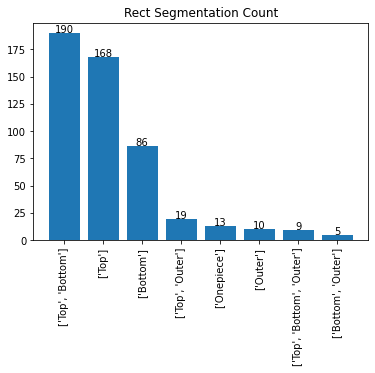

In [ ]:
barplot_rect = plt.bar(rect_count_labels, rect_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot_rect) :
    plt.text(i, j.get_height() + 0.5, rect_count_values[i], ha = 'center')

plt.title("Rect Segmentation Count")
plt.show()

In [ ]:
total = np.sum(rect_count_values)
rect_count_labels_ratio = []

for i in range(0, len(rect_count_labels)):
    ratio = (rect_count_values[i]/total) * 100

    new_label = rect_count_labels[i] + (' %.1f%%' % ratio)
    rect_count_labels_ratio.append(new_label)

print("Complete")

Complete


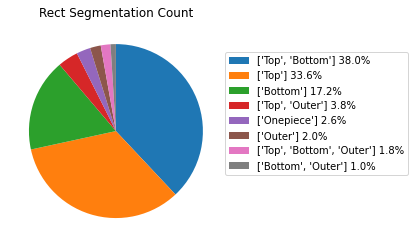

In [ ]:
plt.pie(rect_count_values, startangle=90, counterclock=False)

plt.title("Rect Segmentation Count")
plt.legend(rect_count_labels_ratio, loc=(1.0, 0.3))
plt.show()

##  폴리곤 좌표 정보 통계

In [ ]:
poly_name_list = []

for ori_file in ori_file_list:
    poly_name = seg_parts_check(ori_file[1]['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표'])

    poly_name_list.append(poly_name)

    if ((len(poly_name_list))%50) == 0: # 진행도 체크용
        print(str(len(poly_name_list)) + "개 정보 읽어오기 완료")

print()
print("Complete")

50개 정보 읽어오기 완료
100개 정보 읽어오기 완료
150개 정보 읽어오기 완료
200개 정보 읽어오기 완료
250개 정보 읽어오기 완료
300개 정보 읽어오기 완료
350개 정보 읽어오기 완료
400개 정보 읽어오기 완료
450개 정보 읽어오기 완료
500개 정보 읽어오기 완료

Complete


In [ ]:
len(poly_name_list)

500

In [ ]:
poly_count = {}

for item in poly_name_list:
    if str(item) not in poly_count: # 해당 키가 없을 경우
        poly_count[str(item)] = 1
    else:
        poly_count[str(item)] = poly_count[str(item)]+1

print("Complete")

Complete


In [ ]:
poly_count = sorted(poly_count.items(), key= lambda item:item[1], reverse=True)
poly_count

[("['Top', 'Bottom']", 190),
 ("['Top']", 168),
 ("['Bottom']", 86),
 ("['Top', 'Outer']", 19),
 ("['Onepiece']", 13),
 ("['Outer']", 10),
 ("['Top', 'Bottom', 'Outer']", 9),
 ("['Bottom', 'Outer']", 5)]

In [ ]:
poly_count_labels = []
poly_count_values = []

for item in poly_count:
    poly_count_labels.append(item[0])
    poly_count_values.append(item[1])

print("Complete")

Complete


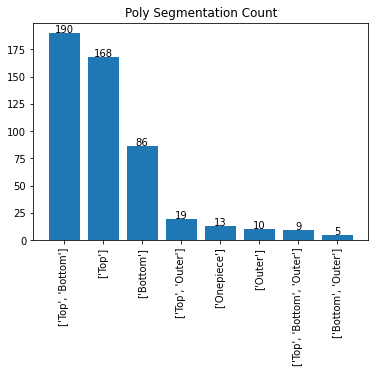

In [ ]:
barplot_poly = plt.bar(poly_count_labels, poly_count_values)
plt.xticks(rotation=90)

for i, j in enumerate(barplot_poly) :
    plt.text(i, j.get_height() + 0.5, poly_count_values[i], ha = 'center')

plt.title("Poly Segmentation Count")
plt.show()

In [ ]:
total = np.sum(poly_count_values)
poly_count_labels_ratio = []

for i in range(0, len(poly_count_labels)):
    ratio = (poly_count_values[i]/total) * 100

    new_label = poly_count_labels[i] + (' %.1f%%' % ratio)
    poly_count_labels_ratio.append(new_label)

print("Complete")

Complete


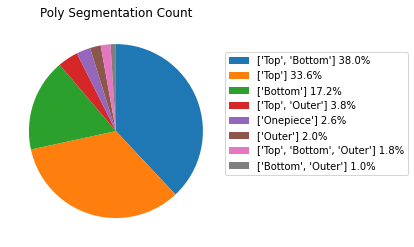

In [ ]:
plt.pie(poly_count_values, startangle=90, counterclock=False)

plt.title("Poly Segmentation Count")
plt.legend(poly_count_labels_ratio, loc=(1.0, 0.3))
plt.show()

## 원피스 이미지 좌우반전 여부 결정

In [ ]:
# True일시 좌우반전을 적용한다.
# False일시 좌우반전을 하지 않는다.
onepiece_flip = True

## 디렉토리에 저장

In [ ]:
file_num = start_save_point - 1 # 밑에서 +1을 하고 시작하므로

for ori_file in ori_file_list:

    # 세그멘테이션 좌표 정보 확인
    rect_name_list = seg_parts_check(ori_file[1]['데이터셋 정보']['데이터셋 상세설명']['렉트좌표'])
    poly_name_list = seg_parts_check(ori_file[1]['데이터셋 정보']['데이터셋 상세설명']['폴리곤좌표'])

    if ((len(rect_name_list)==0) or (len(poly_name_list)==0)): # 좌표 정보가 없는 파일일 경우
        continue # 파일을 저장하지 않고 넘긴다.


    file_num = file_num + 1

    if (file_num%50) == 0: # 진행도 체크용
        print(str(file_num) + "번째 파일 작업중...")

    img_file_path = proc_img_dir_name + str(file_num) + ".jpg"
    json_file_path = proc_json_dir_name + str(file_num) + ".json"

    # 원본 이미지를 그대로 저장
    success = img_file_save(ori_file[0], img_file_path, False)
    if not success:
        print(str(file_num) + "번째 이미지 파일 저장 실패!")
        break

    # 원본 json 파일을 가공하여 저장
    success = json_file_save(ori_file[1], json_file_path, False)
    if not success:
        print(str(file_num) + "번째 json 파일 저장 실패!")
        break

    # 무사히 저장이 완료
    end_save_point = file_num


    if (onepiece_flip == False): # 원피스는 좌우반전하지 않을 경우
        if rect_name_list == ['Onepiece']: # 원피스 좌표만 있는 파일일 경우
            continue # 이하 좌우반전 코드는 실행하지 않고 다음 파일로 넘긴다


    flip_file_num = file_num + max_read_size
    flip_img_file_path = proc_img_dir_name + str(flip_file_num) + ".jpg"
    flip_json_file_path = proc_json_dir_name + str(flip_file_num) + ".json"

    # 이미지를 좌우반전하여 저장
    success = img_file_save(ori_file[0], flip_img_file_path, True)
    if not success:
        print("좌우반전한" + str(file_num) + "번째 이미지 파일 저장 실패!")
        break

    # json 파일을 좌우반전하여 저장
    success = json_file_save(ori_file[1], flip_json_file_path, True)
    if not success:
        print("좌우반전한" + str(file_num) + "번째 json 파일 저장 실패!")
        break


print()
print(str(end_save_point) + "까지 파일 저장 성공!!")

10900번째 파일 작업중...
10950번째 파일 작업중...
11000번째 파일 작업중...
11050번째 파일 작업중...
11100번째 파일 작업중...
11150번째 파일 작업중...
11200번째 파일 작업중...
11250번째 파일 작업중...
11300번째 파일 작업중...
11350번째 파일 작업중...

11381까지 파일 저장 성공!!


# 폴더를 확인하여 저장이 잘 되었는지 확인